This example aims to have two target orbits, and one observer orbit. The observer is tasked with monitoring the two targets to minimize the trace covariance of the state over the simulation horizon. We use a PPO agent that is rewarded for minimizing the trace covariance of the target states to the best of its ability.

In [1]:
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt
from data_util.target_generation import TargetGenerator

In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])

# 2:1 Resonant, period = 6.45 TU
x0_4 = np.array([
        0.9519486347314083,
        0.0,
        0.0,
        0.0,
        -0.952445273435512,
        0.0
    ])

# 3:1 Resonant, period = 6.45 TY
x0_5 = np.array([
        0.13603399956670137,
        0.0,
        0.0,
        1.9130717669166003e-12,
        3.202418276067991,
        0.0
    ])

# 1:1 L1 Lyapunov, period = 6.45 TU
x0_6 = np.array([
        0.65457084231188,
        0.0,
        0.0,
        3.887957091335523e-13,
        0.7413347560791179,
        0.0
    ])


In [3]:
tg = TargetGenerator([x0_1, x0_2, x0_3, x0_4, x0_5, x0_6], periods=[3.225, 3.225, 6.45, 6.45, 6.45, 6.45])

In [4]:
out = tg.gen_phased_ics(catalog_ID=0, num_targets=3)
out[1]

{'state': array([ 1.0806927 , -0.12323006, -0.00757954, -0.07789012,  0.07947237,
         0.21008552]),
 'covariance': array([[1.69189439e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.69189439e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.69189439e-06, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.52656549e-07,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         9.52656549e-07, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 9.52656549e-07]]),
 'period': 3.225,
 'phase': 0.3333333333333333,
 'spline': <scipy.interpolate._bsplines.BSpline at 0x11f6efda0>,
 'stm_spline': <scipy.interpolate._bsplines.BSpline at 0x15a77fe30>}

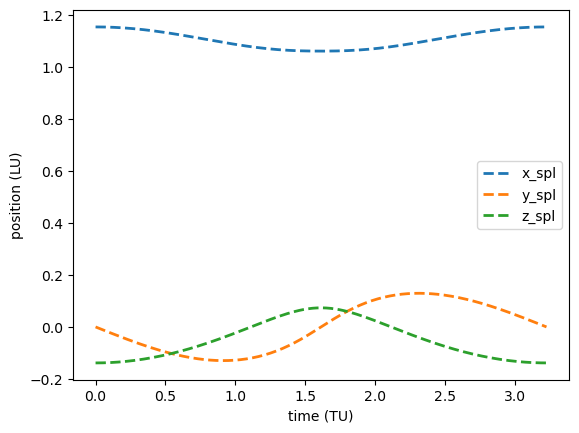

In [5]:
tt = np.linspace(0, 1*tg.periods[0], 300)
data_spl = out[0]["spline"](tt)
stm_spl = out[0]["stm_spline"](tt)

plt.figure(6)
plt.clf()
plt.xlabel("time (TU)")
plt.ylabel("position (LU)")
# plt.plot(data[:, 0], data[:, 1:4], label = ["x", "y", "z"])
plt.plot(tt, data_spl[:, :3], label = ["x_spl", "y_spl", "z_spl"], linestyle = "--", linewidth = 2.0)
plt.legend()
plt.show()

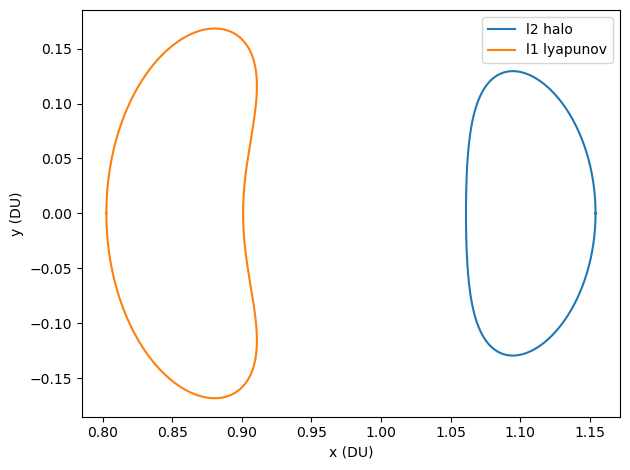

In [6]:
ax = plt.figure(7).add_subplot()

# Prepare arrays x, y, z

ax.plot(data_spl[:, 0], data_spl[:, 1], label='l2 halo')
ax.set_xlabel('x (DU)')
ax.set_ylabel('y (DU)')

out = tg.gen_phased_ics(catalog_ID=1, num_targets=4)
tt = np.linspace(0, 1*tg.periods[1], 300)
data_spl = out[0]["spline"](tt)
stm_spl = out[0]["stm_spline"](tt)

ax.plot(data_spl[:, 0], data_spl[:, 1], label='l1 lyapunov')
ax.legend()

plt.tight_layout()
plt.show()

In [7]:
out[3]

{'state': array([ 0.87865255, -0.16826693,  0.        , -0.12091164,  0.00891462,
         0.        ]),
 'covariance': array([[1.69189439e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.69189439e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.69189439e-06, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.52656549e-07,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         9.52656549e-07, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 9.52656549e-07]]),
 'period': 3.225,
 'phase': 0.75,
 'spline': <scipy.interpolate._bsplines.BSpline at 0x15a1a2e70>,
 'stm_spline': <scipy.interpolate._bsplines.BSpline at 0x15a6f40e0>}

In [8]:
vals = np.linalg.eigvals(stm_spl[-1].reshape(6, 6))
vals

array([9.47278466e+02, 1.05565579e-03, 9.99455895e-01, 1.00054440e+00,
       1.57228437e+00, 6.36017263e-01])